## 데이터 불러오기

In [27]:
import pandas as pd

movie = pd.read_csv('data/MoviePerformance.csv')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 9 columns):
Title             236 non-null object
Grade             215 non-null object
Length            229 non-null float64
Genre             232 non-null object
Rating            235 non-null float64
Users             235 non-null float64
BoxOfficeFirst    225 non-null float64
ScreenFirst       225 non-null float64
BoxOffice         235 non-null float64
dtypes: float64(6), object(3)
memory usage: 16.7+ KB


In [28]:
movie['Genre'].value_counts()

Comedy       70
Drama        62
Action       39
Adventure    12
Horror       12
Crime        11
Animation    11
Biography     9
Fantasy       1
Romance       1
Musical       1
History       1
Sci-Fi        1
Western       1
Name: Genre, dtype: int64

In [29]:
movie2 = movie[movie['ScreenFirst'] > 500]

In [75]:
movie_train = movie2.iloc[0:80]
movie_test = movie2.iloc[80:]

In [76]:
len(movie_train)

80

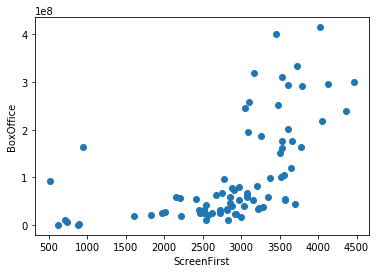

In [32]:
import matplotlib.pyplot as plt

plt.scatter(movie_train['ScreenFirst'], movie_train['BoxOffice'])
plt.xlabel('ScreenFirst')
plt.ylabel('BoxOffice')
plt.savefig('chap-regression-scatter.jpg',dpi=400,bbox_inches='tight')
plt.show()

In [33]:
from scipy.stats.stats import pearsonr

pearsonr(movie_train.ScreenFirst, movie_train.BoxOffice)

(0.5657943903868421, 4.526401745297524e-08)

## 단순 회귀분석

In [34]:
import statsmodels.api as sm 

x = movie_train['ScreenFirst']
y = movie_train['BoxOffice']
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

/Users/fastbat/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BoxOffice   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     36.73
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           4.53e-08
Time:                        18:32:05   Log-Likelihood:                -1574.6
No. Observations:                  80   AIC:                             3153.
Df Residuals:                      78   BIC:                             3158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.237e+07   3.38e+07     -2.730      0.008    -1.6e+08    -2.5e+07
ScreenFirst  6.843e+04   1.13e+04      6.060      0.000     4.6e+04    9.09e+04
==============================================================================
Omnibus:                       15.239   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.452
Skew:                           1.118   Prob(JB):                     0.000162
Kurtosis:                       3.489   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

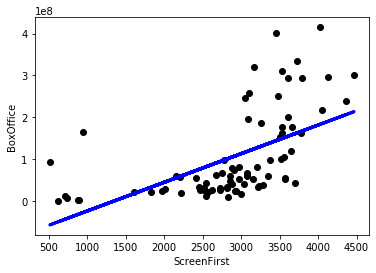

In [36]:
plt.scatter(x, y,  color='black')
plt.plot(x, predictions, color='blue', linewidth=3)
plt.xlabel('ScreenFirst')
plt.ylabel('BoxOffice')
plt.savefig('chap-regression-result.jpg',dpi=400,bbox_inches='tight')
plt.show()

In [37]:
import math

x_test = movie_test['ScreenFirst']
y_test = movie_test['BoxOffice']
X_test = sm.add_constant(x_test)  ## 절편 추가

test_prediction = model.predict(X_test) ## 예측치 생성

mae = sum( abs(test_prediction - y_test) / len(test_prediction))  ## 평균절대오차
rmse = math.sqrt( sum((test_prediction - y_test)**2) / len(test_prediction) ) ## 평균제곱근오차
mape = ((abs(test_prediction - y_test)/y_test)*100).mean() ## 평균절대퍼센티지오차

print('MAE : ', mae)
print('RMSE : ', rmse)
print('MAPE : ', mape)

MAE :  59127817.22077838
RMSE :  74652771.40057965
MAPE :  382.4899582731036


In [38]:
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(test_prediction, y_test))
rmse

74652771.40057965

## 다중 회귀분석

In [39]:
import statsmodels.api as sm 

x = movie_train[['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y = movie_train['BoxOffice']
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()
predictions = model.predict(X)

x_test = movie_test[['ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y_test = movie_test['BoxOffice']
X_test = sm.add_constant(x_test)  ## 절편 추가

test_prediction = model.predict(X_test) ## 예측치 생성

mae = sum( abs(test_prediction - y_test) / len(test_prediction))  ## 평균절대오차
rmse = math.sqrt( sum((test_prediction - y_test)**2) / len(test_prediction) ) ## 평균제곱근오차
mape = ((abs(test_prediction - y_test)/y_test)*100).mean() ## 평균절대퍼센티지오차

print('MAE : ', mae)
print('RMSE : ', rmse)
print('MAPE : ', mape)

MAE :  43939227.797135904
RMSE :  57342220.813374504
MAPE :  316.9356186878378


/Users/fastbat/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BoxOffice   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     33.88
Date:                Sun, 16 Aug 2020   Prob (F-statistic):           3.90e-16
Time:                        18:32:23   Log-Likelihood:                -1548.8
No. Observations:                  80   AIC:                             3108.
Df Residuals:                      75   BIC:                             3119.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.649e+07   4.57e+07     -1.672      0.099   -1.68e+08    1.46e+07
ScreenFirst     3.967e+04   9149.658      4.335      0.000    2.14e+04    5.79e+04
BoxOfficeFirst     1.4381      0.248      5.808      0.000       0.945       1.931
Rating            1.3e+06   7.03e+06      0.185      0.854   -1.27e+07    1.53e+07
Users            466.6243    166.750      2.798      0.007     134.441     798.808
==============================================================================
Omnibus:                       27.070   Durbin-Watson:                   1.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.551
Skew:                           1.390   Prob(JB):                     5.76e-10
Kurtosis:                       5.244   Cond. No.                     2.72e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 독립변수 선정

### 시각화및 상관관계 계수 활용 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94ff38deb8>,
      dtype=object)

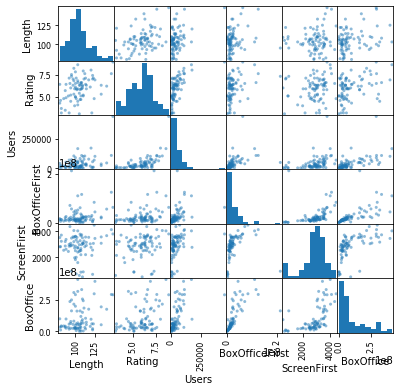

In [44]:
from pandas.plotting import scatter_matrix

scatter_matrix(movie_train, figsize = (6, 6))

In [45]:
movie_train.corr(method='pearson')

,Length,Rating,Users,BoxOfficeFirst,ScreenFirst,BoxOffice
Length,1.000000,0.383731,0.431204,0.205573,0.083900,0.313850
Rating,0.383731,1.000000,0.600066,0.351505,0.213928,0.401332
Users,0.431204,0.600066,1.000000,0.416591,0.379393,0.582753
BoxOfficeFirst,0.205573,0.351505,0.416591,1.000000,0.300200,0.664179
ScreenFirst,0.083900,0.213928,0.379393,0.300200,1.000000,0.565794
BoxOffice,0.313850,0.401332,0.582753,0.664179,0.565794,1.000000


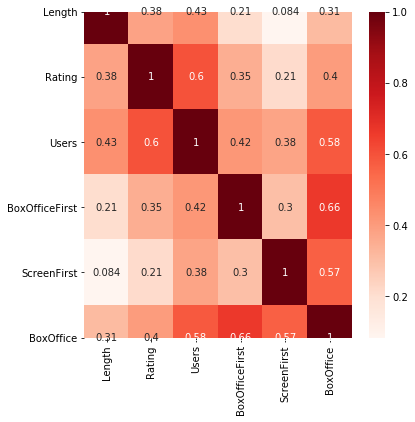

In [46]:
import seaborn as sns 

plt.figure(figsize=(6,6))
cor = movie_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 다중 공선성 

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):

    vif = pd.DataFrame()
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]

    return(vif)

calc_vif(x)

,variables,VIF
0,ScreenFirst,10.351665
1,BoxOfficeFirst,2.097737
2,Rating,10.946215
3,Users,2.148866


In [52]:
x_1 = movie_train[['ScreenFirst', 'BoxOfficeFirst', 'Users']]
calc_vif(x_1)

,variables,VIF
0,ScreenFirst,2.214435
1,BoxOfficeFirst,2.084525
2,Users,2.048384


### 독립변수 제거 방안 (Wrapper method)

- 후진 제거법 Backward elimination 

In [33]:
movie_train.head()

,Title,Grade,Length,Genre,Rating,Users,BoxOfficeFirst,ScreenFirst,BoxOffice
0,Ramona and Beezus,PG,103.0,Adventure,6.6,4274.0,7810481.0,2719.0,26161406.0
1,Toy Story 3,PG,103.0,Animation,8.6,168181.0,110307189.0,4028.0,414984497.0
22,Standing Ovation,NaN,105.0,Musical,3.1,174.0,343125.0,625.0,531806.0
29,Letters to God,PG,110.0,Drama,5.1,1718.0,1101204.0,897.0,2848578.0
30,Extraordinary Measures,PG,106.0,Drama,6.3,7133.0,6012594.0,2545.0,11854694.0


In [53]:
x = movie_train[['Length','ScreenFirst', 'BoxOfficeFirst', 'Rating', 'Users']]
y = movie_train['BoxOffice']
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()
model.pvalues

const             4.623600e-02
Length            2.210037e-01
ScreenFirst       2.988469e-05
BoxOfficeFirst    1.552957e-07
Rating            9.814787e-01
Users             2.099705e-02
dtype: float64

In [54]:
X=X.drop(['Rating'],axis=1)
model=sm.OLS(y, X).fit()
model.pvalues

const             2.791602e-02
Length            2.128935e-01
ScreenFirst       2.617403e-05
BoxOfficeFirst    1.025472e-07
Users             9.872523e-03
dtype: float64

In [55]:
X=X.drop(['Length'],axis=1)
model=sm.OLS(y, X).fit()
model.pvalues

const             7.167763e-03
ScreenFirst       4.043731e-05
BoxOfficeFirst    8.200554e-08
Users             1.005283e-03
dtype: float64

In [56]:
from sklearn.metrics import mean_squared_error

x_test = movie_test[['ScreenFirst', 'BoxOfficeFirst', 'Users']]
y_test = movie_test['BoxOffice']
X_test = sm.add_constant(x_test)  ## 절편 추가

test_prediction = model.predict(X_test) ## 예측치 생성

rmse = math.sqrt(mean_squared_error(test_prediction, y_test))
rmse

57139129.88399198

## 학습, 테스트 집합

In [38]:
import pandas as pd
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

movie = pd.read_csv('data/MoviePerformance.csv')
movie2 = movie[movie['ScreenFirst'] > 500]
x = movie2['ScreenFirst'] 
y = movie2['BoxOffice'] 
X = sm.add_constant(x) 

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=None) 

model = sm.OLS(y_train, X_train).fit() 
predictions = model.predict(X_test)

rmse = math.sqrt(mean_squared_error(predictions, y_test))
rmse

72656350.97505683

## 교차검증

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

movie = pd.read_csv('data/MoviePerformance.csv')
movie2 = movie[movie['ScreenFirst'] > 500]
X = movie2[['ScreenFirst', 'BoxOfficeFirst', 'Users']] 
y = movie2['BoxOffice'] 

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_absolute_error')

## neg_root_mean_squared_error

scores

array([-41756654.25873675, -51127554.98678496, -35806481.38716213,
       -70691665.37988572, -41287617.45942155])

In [92]:
scores.mean()

-48133994.694398224

## 연습 문제 

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [94]:
boston = pd.read_csv("data/boston.csv")

In [95]:
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


- Housing Values in Suburbs of Boston

- ID: 지역 번호 
- crim: per capita crime rate by town (범죄율)
- zn: proportion of residential land zoned for lots over 25,000 sq.ft. (주거지비율)
- indus: proportion of non-retail business acres per town. (산업지비율)
- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). (강 근접 여부)
- nox: nitrogen oxides concentration (parts per 10 million) (질소산화물 농도)
- rm: average number of rooms per dwelling. (평균 방 수)
- age: proportion of owner-occupied units built prior to 1940. (1940년 이전에 지어진 주택의 비율)
- dis: weighted mean of distances to five Boston employment centres. (주요 업무지구와의 평균 거리)
- rad: index of accessibility to radial highways. (고속도로 접근성 지표)
- tax: full-value property-tax rate per 10,000 U.S dollar. (세율)
- ptratio: pupil-teacher ratio by town. (학생당 선생님 비율)
- black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (흑인 주거 비율)
- lstat: lower status of the population (percent). (인구 중 하위 계층 비율)
- medv: median value of owner-occupied homes in 1000 U.S dollars. (주택 가격 중앙값)

## 데이터 탐색 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f950c774d68>,
      dtype=object)

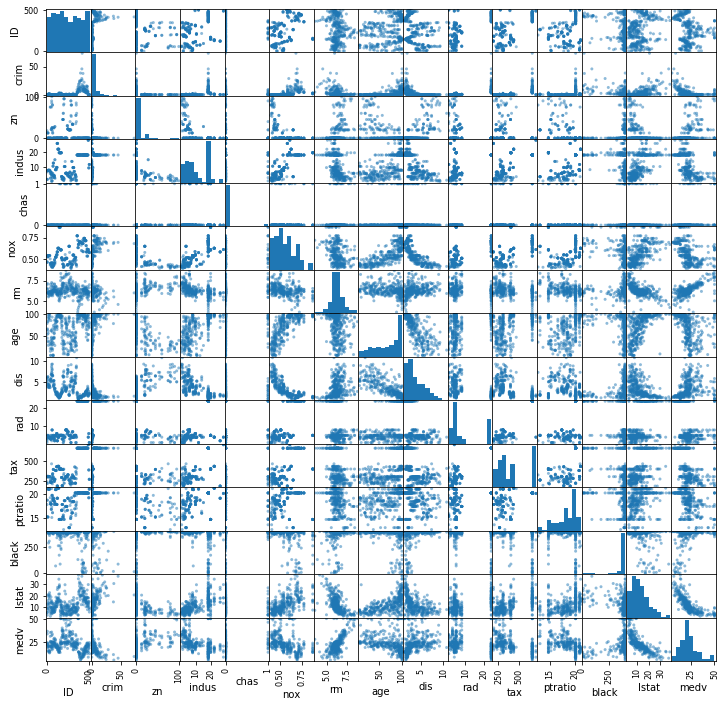

In [99]:
from pandas.plotting import scatter_matrix

scatter_matrix(boston, figsize = (12, 12))

- medv 와 상관관계가 보이는 변수 crim, indus, nox, rm, black, lstat

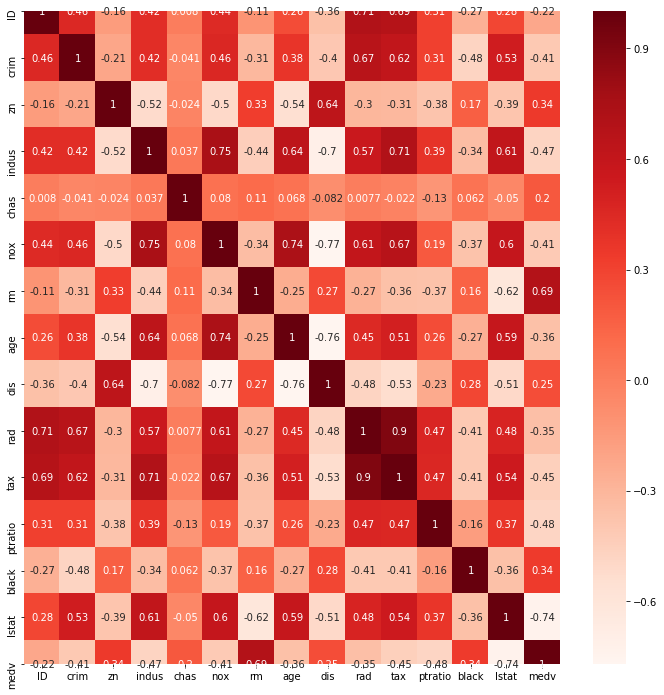

In [101]:
import seaborn as sns 

plt.figure(figsize=(12,12))
cor = boston.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

- age, dis, rad, tax, ptratio 도 상관관계 존재

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(inputs):

    vif = pd.DataFrame()
    vif["variables"] = inputs.columns
    vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]

    return(vif)

In [104]:
boston = boston.drop(['ID'], axis=1)

calc_vif(boston)

,variables,VIF
0,crim,2.650063
1,zn,2.617414
2,indus,13.808492
3,chas,1.166800
4,nox,75.661392
5,rm,135.373313
6,age,21.967034
7,dis,16.552909
8,rad,14.911887
9,tax,57.116414


In [123]:
x = boston.drop(['medv'],axis=1)
y = boston['medv']
X = sm.add_constant(x)

model = sm.OLS(y,X).fit()
model.pvalues

const      1.256136e-07
crim       3.299747e-01
zn         5.344095e-03
indus      4.687111e-01
chas       1.108047e-03
nox        1.314957e-03
rm         3.234334e-12
age        7.842620e-01
dis        1.150750e-08
rad        7.308986e-05
tax        4.694260e-03
ptratio    3.881855e-07
black      1.306714e-03
lstat      1.070055e-18
dtype: float64

- age 제거 

In [124]:
X=X.drop(['age'],axis=1)
model=sm.OLS(y, X).fit()
model.pvalues

const      9.409352e-08
crim       3.293555e-01
zn         4.594669e-03
indus      4.636234e-01
chas       1.112687e-03
nox        6.583172e-04
rm         1.247794e-12
dis        1.923356e-09
rad        5.755337e-05
tax        4.261551e-03
ptratio    2.947872e-07
black      1.330265e-03
lstat      1.041730e-20
dtype: float64

- indus 제거

In [125]:
X=X.drop(['indus'],axis=1)
model=sm.OLS(y, X).fit()
model.pvalues

const      1.088757e-07
crim       3.008755e-01
zn         5.471297e-03
chas       8.930414e-04
nox        8.538017e-04
rm         1.513440e-12
dis        2.513821e-10
rad        6.822808e-05
tax        4.766563e-03
ptratio    3.732191e-07
black      1.454475e-03
lstat      1.081310e-20
dtype: float64

- crim 제거

In [126]:
X=X.drop(['crim'],axis=1)
model=sm.OLS(y, X).fit()
model.pvalues

const      1.706257e-07
zn         7.098549e-03
chas       7.947973e-04
nox        1.139002e-03
rm         1.030853e-12
dis        3.890661e-10
rad        1.085638e-04
tax        5.657253e-03
ptratio    4.607103e-07
black      3.617768e-04
lstat      1.537228e-22
dtype: float64

In [127]:
X=X.drop(['const'],axis=1)

In [128]:
calc_vif(X)

,variables,VIF
0,zn,2.471216
1,chas,1.123728
2,nox,65.579469
3,rm,75.929875
4,dis,11.992897
5,rad,12.005239
6,tax,45.710195
7,ptratio,84.119383
8,black,21.490905
9,lstat,9.419972


- ptratio 제거

In [129]:
X=X.drop(['ptratio'],axis=1)
calc_vif(X)

,variables,VIF
0,zn,2.122294
1,chas,1.108099
2,nox,65.496130
3,rm,58.792941
4,dis,10.302051
5,rad,12.005180
6,tax,42.601015
7,black,19.869245
8,lstat,8.240651


- nox 제거

In [130]:
X=X.drop(['nox'],axis=1)
calc_vif(X)

,variables,VIF
0,zn,2.080954
1,chas,1.102438
2,rm,31.226078
3,dis,8.963349
4,rad,11.871043
5,tax,36.894450
6,black,19.527500
7,lstat,6.124816


- tax 제거

In [131]:
X=X.drop(['tax'],axis=1)
calc_vif(X)

,variables,VIF
0,zn,2.075234
1,chas,1.095537
2,rm,26.262851
3,dis,8.865402
4,rad,3.324742
5,black,19.203768
6,lstat,5.028412


- rm 제거

In [132]:
X=X.drop(['rm'],axis=1)
calc_vif(X)

,variables,VIF
0,zn,2.074683
1,chas,1.084786
2,dis,7.713287
3,rad,2.888837
4,black,8.927402
5,lstat,4.848471


In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_absolute_error')

## neg_root_mean_squared_error

scores

array([-3.134203  , -4.42735918, -5.59407829, -4.94504329, -3.7983439 ])

In [144]:
scores.mean()

-4.379805530344062

### 모두 넣고 수행 해보기

In [145]:
boston_ind = boston.drop(['medv'],axis=1)

scores_all = cross_val_score(lin_reg, boston_ind, y, cv=5, scoring='neg_mean_absolute_error')
scores_all

array([-2.66002906, -4.04621851, -4.22494518, -6.08784855, -7.24810396])

In [146]:
scores_all.mean()

-4.853429054378494